In [ ]:
#install pycaret
#pip install pycaret

In [1]:
from pycaret.utils import version
version()

'2.3.10'

In [2]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Wisangg\JupyterLab\MOCK_DATAA.csv")

In [3]:
data

,tds,ec,ph
0,812,5.6,1.5
1,577,5.8,1.4
2,770,5.5,1.5
3,764,6.0,1.6
4,749,5.9,1.6
...,...,...,...
995,685,5.7,1.3
996,732,5.9,1.4
997,634,5.8,1.4
998,786,6.0,1.3


In [4]:
data.shape

(1000, 3)

In [6]:
from pycaret.anomaly import *
s = setup(data, log_experiment=True, experiment_name='coba-anomaly')

,Description,Value
0,session_id,7019
1,Original Data,"(1000, 3)"
2,Missing Values,False
3,Numeric Features,3
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1000, 3)"
9,CPU Jobs,-1


2022/05/23 12:21:22 INFO mlflow.tracking.fluent: Experiment with name 'coba-anomaly' does not exist. Creating a new experiment.


In [8]:
anomali = create_model('iforest', fraction=0.01)

In [9]:
results = assign_model(anomali)
results.head()

,tds,ec,ph,Anomaly,Anomaly_Score
0,812,5.6,1.5,0,-0.217302
1,577,5.8,1.4,0,-0.217666
2,770,5.5,1.5,0,-0.207685
3,764,6.0,1.6,0,-0.188394
4,749,5.9,1.6,0,-0.241996


In [10]:
results['Anomaly'] == 1

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Anomaly, Length: 1000, dtype: bool

In [11]:
results['Anomaly'].sum()

10

<AxesSubplot:>

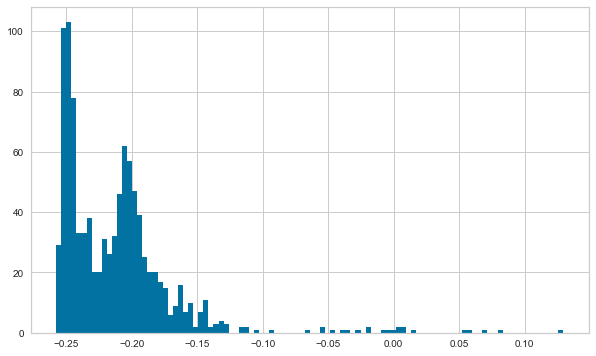

In [12]:
results['Anomaly_Score'].hist(bins=100,figsize=(10,6))

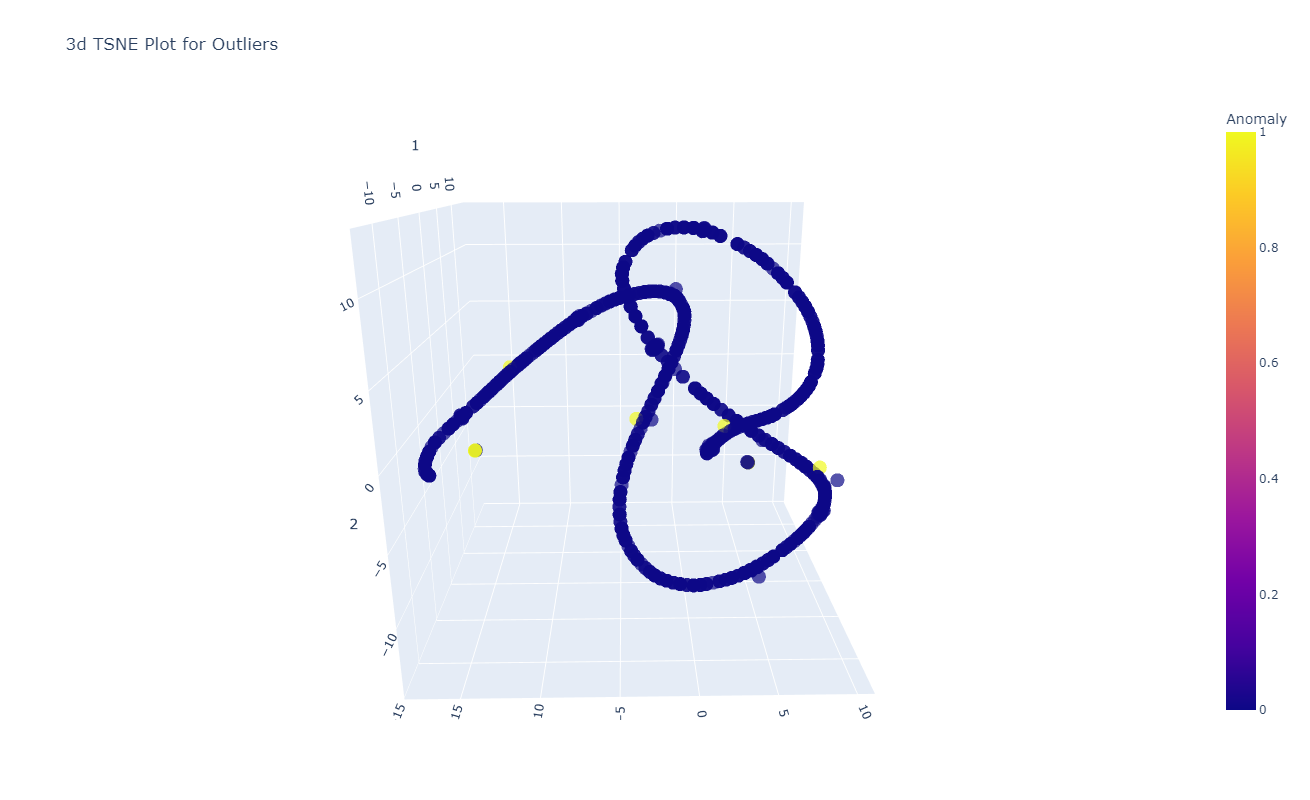

In [14]:
plot_model(anomali, plot='tsne')

In [16]:
save_model(anomali, model_name = 'abc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  IFo

In [17]:
l = load_model('abc')

Transformation Pipeline and Model Successfully Loaded


In [18]:
from pycaret.anomaly import load_model, predict_model
datass = pd.read_csv(r"C:\Users\Wisangg\JupyterLab\MOCK_DATA.csv")
l = load_model('abc')
p = predict_model(model = l, data = datass)
p.head()

Transformation Pipeline and Model Successfully Loaded


,tds,ec,ph,Anomaly,Anomaly_Score
0,691,5.85,1.4,0,-0.249965
1,632,5.16,1.6,0,-0.189099
2,564,5.34,0.6,0,-0.047880
3,718,5.30,0.5,0,-0.062362
4,702,5.17,0.9,0,-0.107540


In [19]:
p['Anomaly'].sum()

30

In [23]:
p

,tds,ec,ph,Anomaly,Anomaly_Score
0,691,5.85,1.4,0,-0.249965
1,632,5.16,1.6,0,-0.189099
2,564,5.34,0.6,0,-0.047880
3,718,5.30,0.5,0,-0.062362
4,702,5.17,0.9,0,-0.107540
...,...,...,...,...,...
995,831,5.73,0.5,0,-0.070627
996,785,5.30,0.9,0,-0.099236
997,694,5.21,0.5,0,-0.056493
998,588,5.02,0.2,0,-0.007981


In [27]:
df = pd.DataFrame(p, columns=['tds', 'ec', 'ph', 'Anomaly', 'Anomaly_Score'])
df.to_csv (r"C:\Users\Wisangg\JupyterLab\hasil.csv", index = True, header=True)
print(df)

     tds    ec   ph  Anomaly  Anomaly_Score
0    691  5.85  1.4        0      -0.249965
1    632  5.16  1.6        0      -0.189099
2    564  5.34  0.6        0      -0.047880
3    718  5.30  0.5        0      -0.062362
4    702  5.17  0.9        0      -0.107540
..   ...   ...  ...      ...            ...
995  831  5.73  0.5        0      -0.070627
996  785  5.30  0.9        0      -0.099236
997  694  5.21  0.5        0      -0.056493
998  588  5.02  0.2        0      -0.007981
999  889  5.42  0.8        0      -0.053526

[1000 rows x 5 columns]
